In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [4]:
df= pd.read_csv('D:/大学/UIUC/first semester/machine learning 1/module4/housing2.csv')
#df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',  'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=df.dropna(how='any',axis=0)
df.head()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.038327,0.592379,0.655174,0.119839,0.652477,0.984323,0.206738,0.374650,0.463350,0.333610,...,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.225022,0.983103,0.803619,0.836315,0.163104,0.637497,0.008760,0.631190,0.207978,0.880357,...,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.423233,0.375808,0.271293,0.729824,0.886744,0.043703,0.457700,0.862450,0.901924,0.062488,...,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.743370,0.929103,0.589894,0.644012,0.110490,0.774604,0.306483,0.880599,0.630401,0.928894,...,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.378623,0.786609,0.712752,0.110274,0.762133,0.030069,0.316631,0.667073,0.426443,0.400557,...,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe()

,ATT1,ATT2,ATT3,ATT4,ATT5,ATT6,ATT7,ATT8,ATT9,ATT10,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,0.507191,0.500668,0.506658,0.499655,0.527124,0.506069,0.502418,0.512655,0.479226,0.507939,...,0.540816,6.343538,65.557965,4.043570,7.823009,377.442478,18.247124,369.826504,11.441881,23.750442
std,0.284419,0.299411,0.294063,0.294441,0.285235,0.280041,0.290118,0.292196,0.298605,0.296397,...,0.113816,0.666808,28.127025,2.090492,7.543494,151.327573,2.200064,68.554439,6.156437,8.808602
min,0.000727,0.000321,0.000013,0.001541,0.003970,0.000679,0.003653,0.000525,0.001093,0.000263,...,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,6.300000
25%,0.256733,0.239338,0.236364,0.230636,0.281583,0.280421,0.268465,0.254963,0.205996,0.263324,...,0.447000,5.926750,40.950000,2.354750,4.000000,276.750000,16.800000,377.717500,6.587500,18.500000
50%,0.509351,0.480324,0.526013,0.510099,0.523238,0.502717,0.496009,0.513433,0.465557,0.497178,...,0.519000,6.229000,71.800000,3.550400,5.000000,307.000000,18.600000,392.080000,10.250000,21.950000
75%,0.759448,0.776950,0.755411,0.757908,0.772381,0.726931,0.765879,0.769504,0.727407,0.781555,...,0.605000,6.635000,91.625000,5.401100,7.000000,411.000000,20.200000,396.157500,15.105000,26.600000
max,0.995798,0.999265,0.998746,0.995561,0.998635,0.998194,0.999140,0.997083,0.996714,0.999321,...,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.410000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 505
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ATT1     452 non-null    float64
 1   ATT2     452 non-null    float64
 2   ATT3     452 non-null    float64
 3   ATT4     452 non-null    float64
 4   ATT5     452 non-null    float64
 5   ATT6     452 non-null    float64
 6   ATT7     452 non-null    float64
 7   ATT8     452 non-null    float64
 8   ATT9     452 non-null    float64
 9   ATT10    452 non-null    float64
 10  ATT11    452 non-null    float64
 11  ATT12    452 non-null    float64
 12  ATT13    452 non-null    float64
 13  CRIM     452 non-null    float64
 14  ZN       452 non-null    float64
 15  INDUS    452 non-null    float64
 16  CHAS     452 non-null    float64
 17  NOX      452 non-null    float64
 18  RM       452 non-null    float64
 19  AGE      452 non-null    float64
 20  DIS      452 non-null    float64
 21  RAD      452 non

D:\phython\envs\python3point5\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


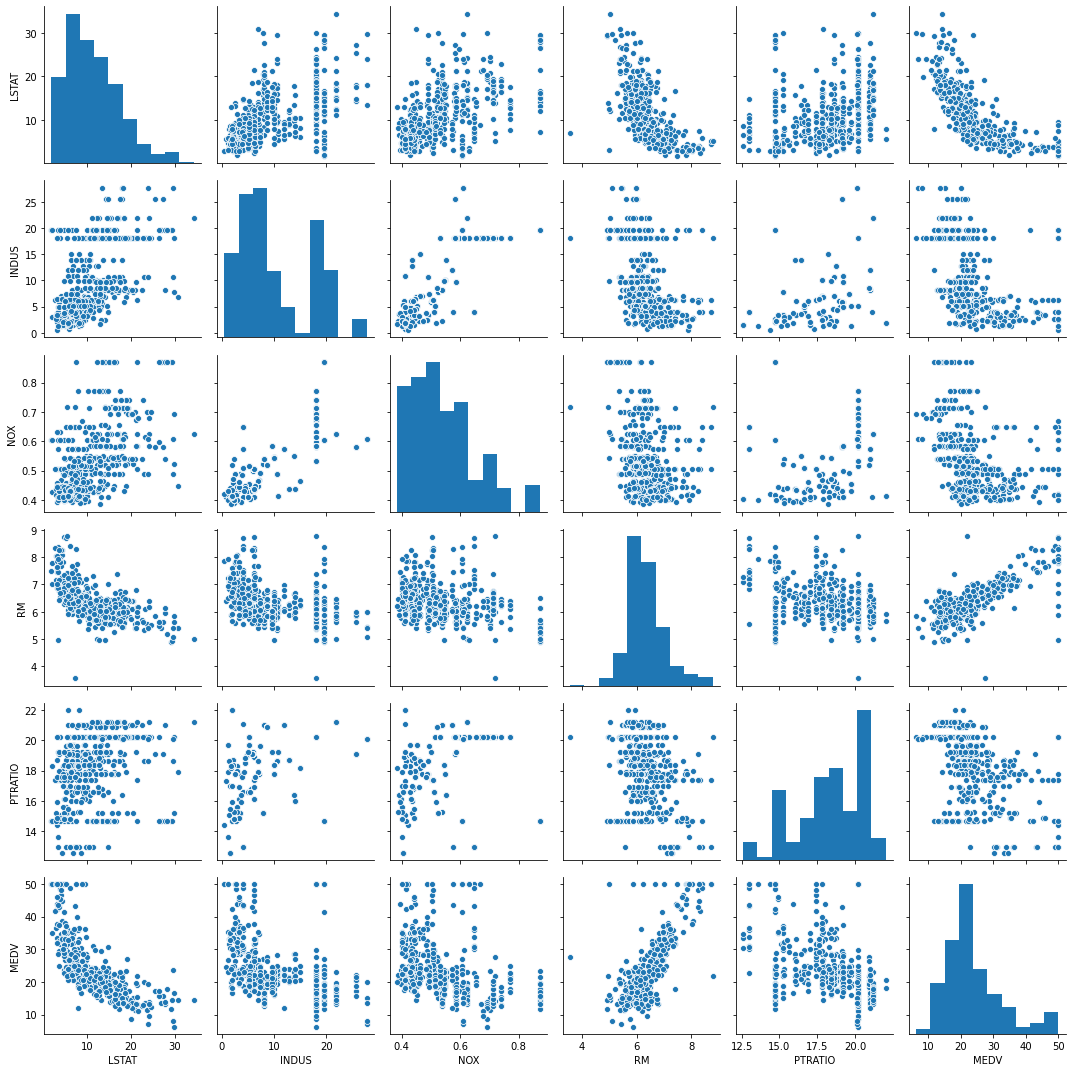

In [58]:
# Visualizing the important characteristics of a dataset
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'PTRATIO','MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

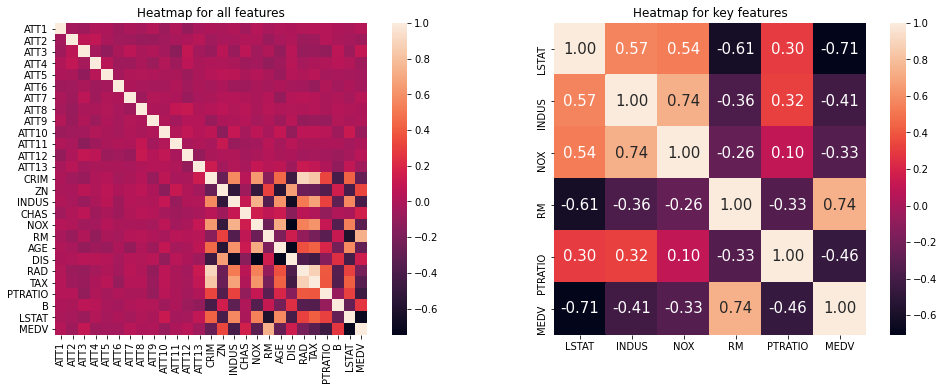

In [59]:
#show heatmap
cm = np.corrcoef(df.values.T)
cm2 = np.corrcoef(df[cols].values.T)
#sns.set(font_scale=1.5)
plt.figure(figsize=(14,10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
plt.sca(ax1)
hm = sns.heatmap(cm,cbar=True,square=True,fmt='.2f',annot=False,yticklabels=df.columns,xticklabels=df.columns,
                 annot_kws={'size': 15})
plt.tight_layout()
plt.title('Heatmap for all features')
plt.sca(ax2)
hm = sns.heatmap(cm2,cbar=True,square=True,fmt='.2f',annot=True,yticklabels=cols,xticklabels=cols,
                 annot_kws={'size': 15})
plt.tight_layout()
plt.title('Heatmap for key features')
plt.show()

In [74]:
#part2: data 
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

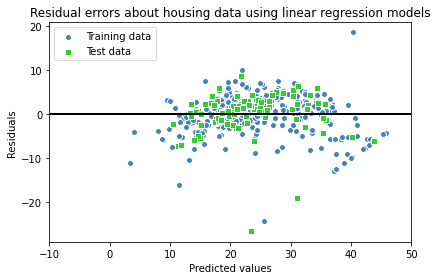

Slope:  [ 2.260 -0.295  0.857 -0.012 -0.296 -0.842 -0.116 -0.773 -0.448 -0.840
 -1.291  1.154 -0.161 -0.202  0.034  0.050  1.770 -12.230  5.422 -0.023
 -1.415  0.254 -0.010 -0.861  0.014 -0.459]
Intercept: 20.538
MSE train: 19.077, test: 22.321
R^2 train: 0.759, test: 0.678


In [30]:
# Evaluating the performance of linear regression models
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors about housing data using linear regression models')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

print('Slope: ' ,end=' ')
slr_coef=slr.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(slr_coef)
print('Intercept: %.3f' % slr.intercept_)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

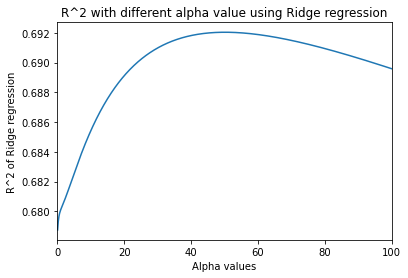

Ridge:Best alpha= 50.1  R^2= 0.692


In [100]:
#Test the best alpha for Ridge regression
begin=0.1
end=100
krange=np.arange(begin,end,0.1)
testscores=[]
trainscores=[]
for k in krange:
    ridge = Ridge(alpha=k)
    ridge.fit(X_train,y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred=ridge.predict(X_test)
    score=ridge.score(X_test,y_test)
    testscores.append(ridge.score(X_test,y_test))
    trainscores.append(ridge.score(X_train,y_train))
#print best alpha and R^2
maxridge=max(testscores)
max_index=testscores.index(maxridge)
best_alpha=max_index/10+begin

plt.plot(krange, testscores)
plt.xlabel('Alpha values')
plt.ylabel('R^2 of Ridge regression')
plt.title('R^2 with different alpha value using Ridge regression')
plt.xlim([-0.1, end])
plt.show()

print('Ridge:Best alpha=',best_alpha,' R^2=','%.3f' %maxridge)

Ridge Regression:
Performance of alpha= 50.1 :
Slope:  [ 0.694 -0.279  0.325 -0.076 -0.231 -0.397  0.012 -0.186 -0.056 -0.257
 -0.576  0.398 -0.006 -0.220  0.043 -0.014  0.646 -0.279  3.627 -0.014
 -1.176  0.275 -0.013 -0.804  0.014 -0.619]
Intercept: 26.077
MSE train: 20.913, test: 21.366
R^2 train: 0.736, test: 0.692


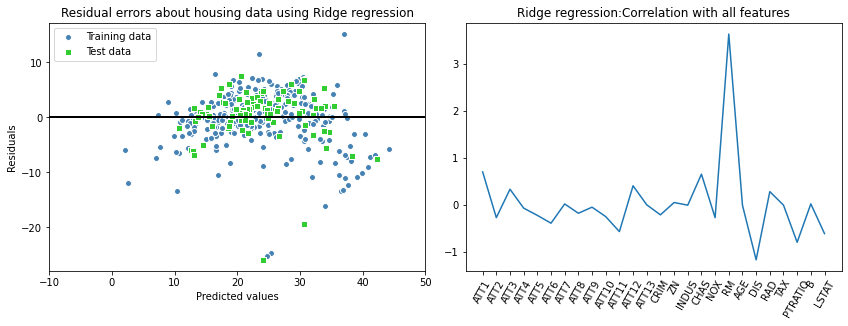

In [102]:
#output the performance with beat alpha in ridge regression
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

#print slope & intercept
print('Ridge Regression:')
print('Performance of alpha=',best_alpha,':')
print('Slope: ' ,end=' ')
ridge_coef=ridge.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(ridge_coef)
print('Intercept: %.3f' % ridge.intercept_)

#print MSE & R^2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#plot residual errors
plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
plt.sca(ax1)
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors about housing data using Ridge regression')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.sca(ax2)
plt.plot(range(len(df.columns.tolist()[0:26])),ridge_coef)
plt.xticks(range(len(df.columns.tolist()[0:26])),df.columns.tolist()[0:26],rotation=60)
plt.title('Ridge regression:Correlation with all features')
plt.show()

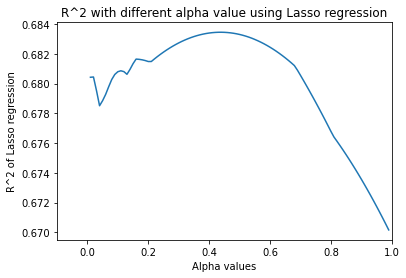

Lasso:Best alpha= 0.44  R^2= 0.683


In [108]:
# LASSO regression: test the best alpha
begin=0.01
end=1
krange=np.arange(begin,end,0.01)
testscores=[]
trainscores=[]
for k in krange:
    lasso = Lasso(alpha=k)
    lasso.fit(X_train,y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred=lasso.predict(X_test)
    score=lasso.score(X_test,y_test)
    testscores.append(lasso.score(X_test,y_test))
    trainscores.append(lasso.score(X_train,y_train))
    
#print best alpha and R^2
maxridge=max(testscores)
max_index=testscores.index(maxridge)
best_alpha=max_index/100+begin

plt.plot(krange, testscores)
plt.xlabel('Alpha values')
plt.ylabel('R^2 of Lasso regression')
plt.title('R^2 with different alpha value using Lasso regression')
plt.xlim([-end/10, end])
plt.show()

print('Lasso:Best alpha=',best_alpha,' R^2=','%.3f' %maxridge)

Lasso Regression:
Performance of alpha= 0.44 :
Slope:  [ 0.000 -0.000  0.000 -0.000 -0.000 -0.000  0.000 -0.000 -0.000 -0.000
 -0.000  0.000 -0.000 -0.000  0.033  0.000  0.000 -0.000  4.097 -0.011
 -0.942  0.179 -0.011 -0.733  0.015 -0.603]
Intercept: 19.593
MSE train: 21.453, test: 21.962
R^2 train: 0.730, test: 0.683


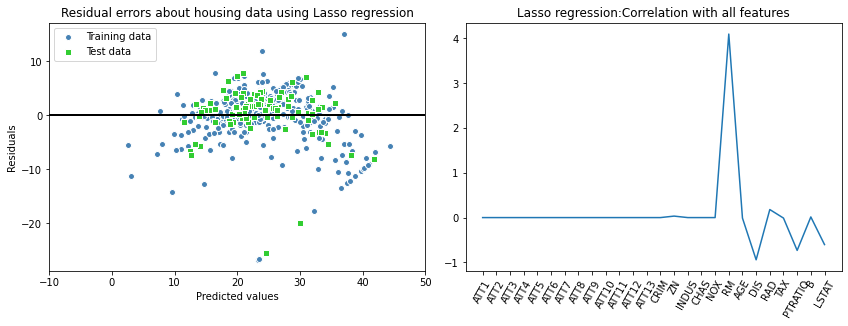

In [109]:
#output the performance with beat alpha in lasso regression
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

#print slope & intercept
print('Lasso Regression:')
print('Performance of alpha=',best_alpha,':')
print('Slope: ' ,end=' ')
lasso_coef=lasso.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(lasso_coef)
print('Intercept: %.3f' % lasso.intercept_)

#print MSE & R^2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#plot residual errors
plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
plt.sca(ax1)
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors about housing data using Lasso regression')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.sca(ax2)
plt.plot(range(len(df.columns.tolist()[0:26])),lasso_coef)
plt.xticks(range(len(df.columns.tolist()[0:26])),df.columns.tolist()[0:26],rotation=60)
plt.title('Lasso regression:Correlation with all features')
plt.show()

In [110]:
# LASSOCV regression: test the best alpha
#X_train, y_train=make_regression()
begin=0.01
end=1
krange=np.arange(begin,end,0.01)
lcv=LassoCV(cv=5,n_alphas=len(krange),alphas=krange).fit(X_train,y_train)
y_train_pred = lcv.predict(X_train)
y_test_pred=lcv.predict(X_test)
score=lcv.score(X_test,y_test)

print('LassoCV:Best alpha=','%.3f' %lcv.alpha_,' R^2=','%.3f' %score)

LassoCV:Best alpha= 0.240  R^2= 0.682


LassoCV Regression:
Performance of alpha= 0.240 :
Slope:  [ 0.000 -0.000  0.000 -0.000 -0.000 -0.000  0.000 -0.000 -0.000 -0.000
 -0.000  0.000 -0.000 -0.000  0.033  0.000  0.000 -0.000  4.744 -0.020
 -1.053  0.178 -0.011 -0.735  0.015 -0.556]
Intercept: 15.816
MSE train: 20.963, test: 22.065
R^2 train: 0.736, test: 0.682


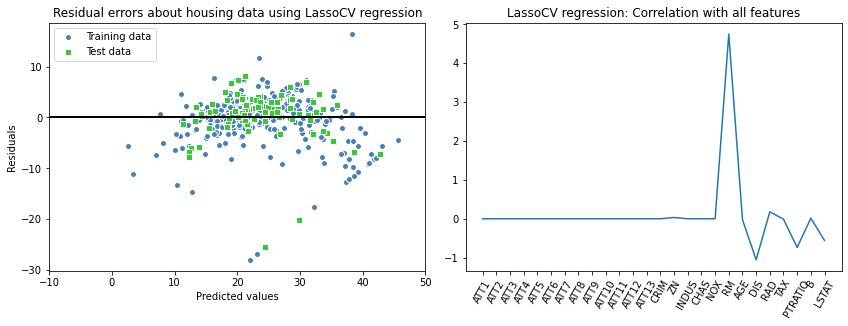

In [111]:
#output the performance with beat alpha in lassoCV regression

#print slope & intercept
print('LassoCV Regression:')
print('Performance of alpha=','%.3f' %lcv.alpha_,':')
print('Slope: ' ,end=' ')
lcv_coef=lcv.coef_
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print(lcv_coef)
print('Intercept: %.3f' % lcv.intercept_)

#print MSE & R^2
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

#plot residual errors
plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
plt.sca(ax1)
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.title('Residual errors about housing data using LassoCV regression')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.sca(ax2)
plt.plot(range(len(df.columns.tolist()[0:26])),lcv_coef)
plt.xticks(range(len(df.columns.tolist()[0:26])),df.columns.tolist()[0:26],rotation=60)
plt.title('LassoCV regression: Correlation with all features')
plt.show()

In [107]:
print("My name is Xin Zhang")
print("My NetID is: xzhan81")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xin Zhang
My NetID is: xzhan81
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
